In [1]:
# Importing pandas and numpy for initial data import and cleaning
import pandas as pd
import numpy as np

print(pd.__version__)
print(np.__version__)

1.4.4
1.21.5


In [2]:
# Initial import and read of the dataset from locally saved folder
data = pd.read_csv("C:\\Users\\Victor\\Documents\\Data Science Projects\\Cybersecurity\\breach_report.csv")
# Preview first lines of loaded data
data.head()

,name_of_covered_entity,state,covered_entity_type,individuals_affected,breach_submission_date,type_of_breach,location_of_breached_information,business_associate_present,web_description
0,iTrust Wellness Group,SC,Healthcare Provider,981,8/10/2023,Hacking/IT Incident,Email,No,NaN
1,Madera County,CA,Health Plan,1146,8/9/2023,Unauthorized Access/Disclosure,Email,No,NaN
2,PCC Pediatric EHR Solutions,VT,Business Associate,520,8/9/2023,Unauthorized Access/Disclosure,Email,Yes,NaN
3,Premera Blue Cross,WA,Health Plan,33212,8/8/2023,Hacking/IT Incident,Network Server,Yes,NaN
4,Redwood Coast Regional Center,CA,Healthcare Provider,1345,8/7/2023,Hacking/IT Incident,Email,No,NaN


In [3]:
data = data.drop("web_description", axis=1)

# Remove rows with blank values
data = data.dropna()

# Get the number of rows in the cleaned-up DataFrame
row_count = data.shape[0]

# Print the number of rows
print("Number of rows in the cleaned-up DataFrame:", row_count)

Number of rows in the cleaned-up DataFrame: 900


In [4]:
# Summary table for "state" column
state_counts = data['state'].value_counts()
state_percentages = data['state'].value_counts(normalize=True) * 100
state_summary = pd.DataFrame({'Count': state_counts, '% of Total': state_percentages})
state_summary = state_summary.sort_values(by='Count', ascending=False)
print("Summary table for 'state' column:")
print(state_summary)

Summary table for 'state' column:
    Count  % of Total
NY     74    8.222222
TX     71    7.888889
CA     68    7.555556
PA     50    5.555556
IL     44    4.888889
MA     42    4.666667
FL     40    4.444444
OH     37    4.111111
NJ     33    3.666667
IN     32    3.555556
MI     32    3.555556
NC     26    2.888889
GA     24    2.666667
AZ     20    2.222222
TN     19    2.111111
VA     18    2.000000
KS     18    2.000000
WA     18    2.000000
MO     16    1.777778
CT     16    1.777778
MD     15    1.666667
MN     15    1.666667
WI     15    1.666667
UT     12    1.333333
OR     11    1.222222
NH     11    1.222222
IA     10    1.111111
KY      9    1.000000
NE      9    1.000000
OK      9    1.000000
CO      8    0.888889
WV      8    0.888889
AL      7    0.777778
SC      7    0.777778
RI      7    0.777778
AR      6    0.666667
DE      5    0.555556
NM      5    0.555556
NV      3    0.333333
SD      3    0.333333
HI      3    0.333333
ME      3    0.333333
LA      3    0.33333

In [5]:
# Summary table for "covered_entity_type" column
entity_type_counts = data['covered_entity_type'].value_counts()
entity_type_percentages = data['covered_entity_type'].value_counts(normalize=True) * 100
entity_type_summary = pd.DataFrame({'Count': entity_type_counts, '% of Total': entity_type_percentages})
entity_type_summary = entity_type_summary.sort_values(by='Count', ascending=False)
print("\nSummary table for 'covered_entity_type' column:")
print(entity_type_summary)


Summary table for 'covered_entity_type' column:
                           Count  % of Total
Healthcare Provider          569   63.222222
Business Associate           204   22.666667
Health Plan                  126   14.000000
Healthcare Clearing House      1    0.111111


In [6]:
# Summary statistics for "individuals_affected" column
individuals_stats = data['individuals_affected'].describe()
print("\nSummary statistics for 'individuals_affected' column:")
print(individuals_stats)


Summary statistics for 'individuals_affected' column:
count    9.000000e+02
mean     1.198209e+05
std      6.151386e+05
min      5.000000e+02
25%      1.330500e+03
50%      5.370000e+03
75%      3.366250e+04
max      1.127000e+07
Name: individuals_affected, dtype: float64


In [7]:
# Summary table for "type_of_breach" column
breach_type_counts = data['type_of_breach'].value_counts()
breach_type_percentages = data['type_of_breach'].value_counts(normalize=True) * 100
breach_type_summary = pd.DataFrame({'Count': breach_type_counts, '% of Total': breach_type_percentages})
breach_type_summary = breach_type_summary.sort_values(by='Count', ascending=False)
print("\nSummary table for 'type_of_breach' column:")
print(breach_type_summary)


Summary table for 'type_of_breach' column:
                                Count  % of Total
Hacking/IT Incident               728   80.888889
Unauthorized Access/Disclosure    144   16.000000
Theft                              17    1.888889
Loss                                6    0.666667
Improper Disposal                   5    0.555556


In [8]:
# Summary table for "location_of_breached_information" column
location_counts = data['location_of_breached_information'].value_counts()
location_percentages = data['location_of_breached_information'].value_counts(normalize=True) * 100
location_summary = pd.DataFrame({'Count': location_counts, '% of Total': location_percentages})
location_summary = location_summary.sort_values(by='Count', ascending=False)
print("\nSummary table for 'location_of_breached_information' column:")
print(location_summary)


Summary table for 'location_of_breached_information' column:
                                                    Count  % of Total
Network Server                                        575   63.888889
Email                                                 190   21.111111
Paper/Films                                            43    4.777778
Electronic Medical Record                              31    3.444444
Other                                                  10    1.111111
Laptop                                                  9    1.000000
Other Portable Electronic Device                        9    1.000000
Electronic Medical Record, Network Server               7    0.777778
Network Server, Other                                   6    0.666667
Desktop Computer                                        4    0.444444
Electronic Medical Record, Other                        2    0.222222
Desktop Computer, Network Server                        2    0.222222
Desktop Computer, Electronic

In [9]:
# Summary table for "business_associate_present" column
business_assoc_counts = data['business_associate_present'].value_counts()
business_assoc_percentages = data['business_associate_present'].value_counts(normalize=True) * 100
business_assoc_summary = pd.DataFrame({'Count': business_assoc_counts, '% of Total': business_assoc_percentages})
business_assoc_summary = business_assoc_summary.sort_values(by='Count', ascending=False)
print("\nSummary table for 'business_associate_present' column:")
print(business_assoc_summary)


Summary table for 'business_associate_present' column:
     Count  % of Total
No     606   67.333333
Yes    294   32.666667


In [10]:
# Split the "location_of_breached_information" column into separate categories
location_categories = data['location_of_breached_information'].str.get_dummies(sep=',')

# Create new columns for each category
new_columns = ['Email', 'Network Server', 'Other', 'Paper/Films', 'Desktop Computer', 'Electronic Medical Record', 'Laptop', 'Other Portable Electronic Device']
location_categories = location_categories[new_columns]

# Add the new columns to the DataFrame
data = pd.concat([data, location_categories], axis=1)

# Print the updated DataFrame
print("Updated DataFrame with new columns:")
print(data.head())

Updated DataFrame with new columns:
          name_of_covered_entity state  covered_entity_type  \
0          iTrust Wellness Group    SC  Healthcare Provider   
1                  Madera County    CA          Health Plan   
2    PCC Pediatric EHR Solutions    VT   Business Associate   
3             Premera Blue Cross    WA          Health Plan   
4  Redwood Coast Regional Center    CA  Healthcare Provider   

   individuals_affected breach_submission_date  \
0                   981              8/10/2023   
1                  1146               8/9/2023   
2                   520               8/9/2023   
3                 33212               8/8/2023   
4                  1345               8/7/2023   

                   type_of_breach location_of_breached_information  \
0             Hacking/IT Incident                            Email   
1  Unauthorized Access/Disclosure                            Email   
2  Unauthorized Access/Disclosure                            Email   
3   

In [11]:
# Doing a spot check to ensure entries match with source data

# Filter the DataFrame based on the specified conditions
filtered_data = data[(data['name_of_covered_entity'] == "Narragansett Bay Commission") &
                     (data['individuals_affected'] == 2153) &
                     (data['type_of_breach'] == "Hacking/IT Incident")]

# Print the full rows from the filtered DataFrame
print("Full rows from the DataFrame:")
print(filtered_data)

Full rows from the DataFrame:
          name_of_covered_entity state  covered_entity_type  \
574  Narragansett Bay Commission    RI  Healthcare Provider   

     individuals_affected breach_submission_date       type_of_breach  \
574                  2153               9/1/2022  Hacking/IT Incident   

    location_of_breached_information business_associate_present  Email  \
574                   Network Server                         No      0   

     Network Server  Other  Paper/Films  Desktop Computer  \
574               1      0            0                 0   

     Electronic Medical Record  Laptop  Other Portable Electronic Device  
574                          0       0                                 0  


In [12]:
# Checking out frequencies for "Yes" vs. "No" on the different locations of breached information

# Create separate summary tables for each column
summary_tables = []
columns = ['Email', 'Network Server', 'Other', 'Paper/Films', 'Desktop Computer', 'Electronic Medical Record', 'Laptop', 'Other Portable Electronic Device']

for column in columns:
    summary_table = data[column].value_counts().reset_index()
    summary_table.columns = [column, 'Count']
    summary_tables.append(summary_table)

# Print the summary tables
for i, column in enumerate(columns):
    print(f"Summary table for '{column}' column:")
    print(summary_tables[i])
    print()

Summary table for 'Email' column:
   Email  Count
0      0    708
1      1    192

Summary table for 'Network Server' column:
   Network Server  Count
0               1    582
1               0    318

Summary table for 'Other' column:
   Other  Count
0      0    889
1      1     11

Summary table for 'Paper/Films' column:
   Paper/Films  Count
0            0    857
1            1     43

Summary table for 'Desktop Computer' column:
   Desktop Computer  Count
0                 0    890
1                 1     10

Summary table for 'Electronic Medical Record' column:
   Electronic Medical Record  Count
0                          0    857
1                          1     43

Summary table for 'Laptop' column:
   Laptop  Count
0       0    890
1       1     10

Summary table for 'Other Portable Electronic Device' column:
   Other Portable Electronic Device  Count
0                                 0    891
1                                 1      9



In [13]:
# Create a summary table for the specified columns
summary_table = pd.DataFrame(columns=['Locations', 'Total Individuals Affected'])

# Iterate over the specified columns
for column in ['Email', 'Network Server', 'Other', 'Paper/Films', 'Desktop Computer', 'Electronic Medical Record', 'Laptop', 'Other Portable Electronic Device']:
    # Calculate the sum of individuals affected for each category
    individuals_affected = data[data[column] == 1]['individuals_affected'].sum()
    
    # Create a temporary DataFrame for the category
    temp_df = pd.DataFrame({'Locations': [column], 'Total Individuals Affected': [individuals_affected]})
    
    # Append the temporary DataFrame to the summary table
    summary_table = summary_table.append(temp_df, ignore_index=True)
    
# Sort the summary table by the "Total Individuals Affected" column in descending order
summary_table = summary_table.sort_values(by='Total Individuals Affected', ascending=False)

# Print the summary table
print("Summary table:")
print(summary_table)

Summary table:
                          Locations Total Individuals Affected
1                    Network Server                   89409978
2                             Other                   11556795
0                             Email                    5532286
5         Electronic Medical Record                     804171
3                       Paper/Films                     308906
4                  Desktop Computer                     113371
6                            Laptop                      93959
7  Other Portable Electronic Device                      19375


C:\Users\Victor\AppData\Local\Temp\ipykernel_12612\2058541052.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_table = summary_table.append(temp_df, ignore_index=True)


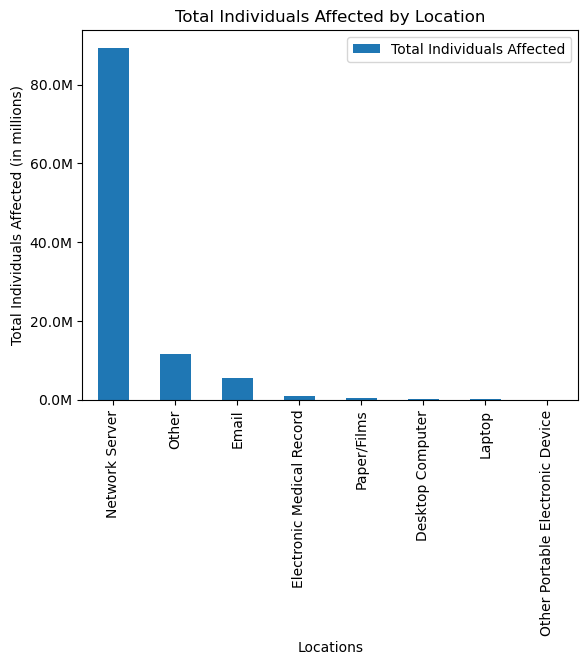

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Sort the summary table by the "Total Individuals Affected" column in descending order
summary_table = summary_table.sort_values(by='Total Individuals Affected', ascending=False)

# Create a bar graph of the summary table
ax = summary_table.plot(x='Locations', y='Total Individuals Affected', kind='bar')

# Set the title and axis labels
plt.title('Total Individuals Affected by Location')
plt.xlabel('Locations')
plt.ylabel('Total Individuals Affected (in millions)')

# Define the function to format the y-axis labels in millions
def millions_formatter(x, pos):
    return '{:.1f}M'.format(x/1000000)

# Apply the millions_formatter function to the y-axis labels
ax.yaxis.set_major_formatter(FuncFormatter(millions_formatter))

# Show the plot
plt.show()

In [15]:
import matplotlib.pyplot as plt

# Filter the data for records where Type of Threat is "Hacking/IT Incident"
filtered_data = data[data['type_of_breach'] == 'Hacking/IT Incident']

# Count the occurrences of each category in the filtered data
category_counts = filtered_data[['Email', 'Network Server', 'Other', 'Paper/Films', 'Desktop Computer', 'Electronic Medical Record', 'Laptop', 'Other Portable Electronic Device']].apply(pd.Series.value_counts).loc[1]

category_counts = category_counts.fillna(0)
print(category_counts)

Email                               158.0
Network Server                      540.0
Other                                 5.0
Paper/Films                           0.0
Desktop Computer                      6.0
Electronic Medical Record            16.0
Laptop                                3.0
Other Portable Electronic Device      0.0
Name: 1, dtype: float64


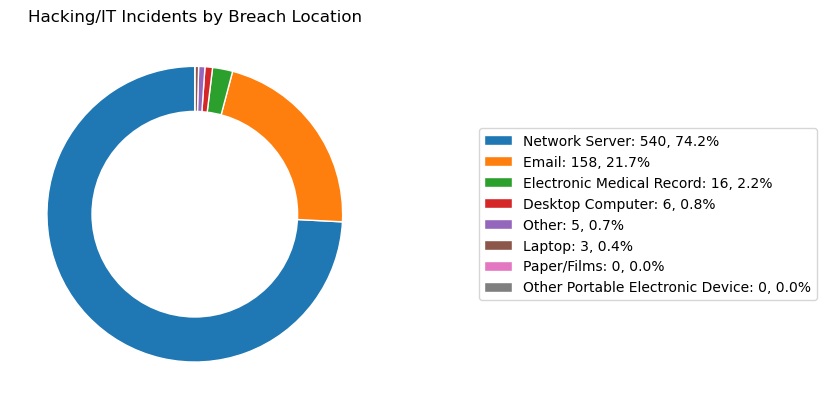

In [16]:
# Sort the category counts in descending order
category_counts_sorted = category_counts.sort_values(ascending=False)

# Create a pie chart of the sorted category counts
plt.pie(category_counts_sorted, labels=None, startangle=90, wedgeprops={'edgecolor': 'white'})

# Add a circle at the center to create a donut chart
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Create the legend with sorted category name, count, and percentage
legend_labels = ['{}: {}, {:.1%}'.format(label, int(count), count/sum(category_counts_sorted)) for label, count in zip(category_counts_sorted.index, category_counts_sorted)]
plt.legend(legend_labels, bbox_to_anchor=(1.25, 0.5), loc='center left')

# Set the title
plt.title('Hacking/IT Incidents by Breach Location')

# Show the chart
plt.show()

In [17]:
import scipy.stats as stats

# Filter the data for records where Type of Threat is "Hacking/IT Incident"
filtered_data = data[data['type_of_breach'] == 'Hacking/IT Incident']

# Count the occurrences of each category in the filtered data
category_counts = filtered_data[['Email', 'Network Server', 'Other', 'Paper/Films', 'Desktop Computer', 'Electronic Medical Record', 'Laptop', 'Other Portable Electronic Device']].apply(pd.Series.value_counts).loc[1]

# Replace NaN values with zeros
category_counts = category_counts.fillna(0)

# Define the expected frequencies assuming an equal distribution
expected_freq = (sum(category_counts) / len(category_counts))

# Perform the Chi-Square Goodness of Fit test
chi2, p_value = stats.chisquare(category_counts, f_exp=expected_freq)

# Print the test statistic and p-value
print("Chi-Square Statistic:", chi2)
print("p-value:", p_value)

Chi-Square Statistic: 2754.307692307693
p-value: 0.0


In [18]:
import statsmodels

In [19]:
from statsmodels.tsa.arima_model import ARIMA

In [20]:
# Read the CSV file into a dataframe
data2 = pd.read_csv("C:\\Users\\Victor\\Documents\\Data Science Projects\\Cybersecurity\\breach_report.csv")

# Filter the data for records where Type of Breach is "Hacking/IT Incidents"
filtered_df = data2[data2['type_of_breach'] == 'Hacking/IT Incident']

# Convert the "breach_submission_date" column to datetime format
filtered_df['breach_submission_date'] = pd.to_datetime(filtered_df['breach_submission_date'])

# Set the "breach_submission_date" column as the index
filtered_df.set_index('breach_submission_date', inplace=True)

# Sort the dataframe by the index (date)
filtered_df.sort_index(inplace=True)

# Print the head of the filtered dataframe
print(filtered_df.head())

                                    name_of_covered_entity state  \
breach_submission_date                                             
2021-07-19                      Youth Consultation Service    NJ   
2021-08-17                     Nova Biomedical Corporation    MA   
2021-08-20                         Gregory P. Vannucci DDS    IA   
2021-08-26              Family Medical Center of Michigan     MI   
2021-08-27                                   CareATC, Inc.    OK   

                        covered_entity_type  individuals_affected  \
breach_submission_date                                              
2021-07-19              Healthcare Provider                  2756   
2021-08-17                      Health Plan                  3774   
2021-08-20              Healthcare Provider                 26144   
2021-08-26              Healthcare Provider                 21988   
2021-08-27              Healthcare Provider                 98774   

                             type_of_br

C:\Users\Victor\AppData\Local\Temp\ipykernel_12612\4148739707.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['breach_submission_date'] = pd.to_datetime(filtered_df['breach_submission_date'])
C:\Users\Victor\AppData\Local\Temp\ipykernel_12612\4148739707.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df.sort_index(inplace=True)


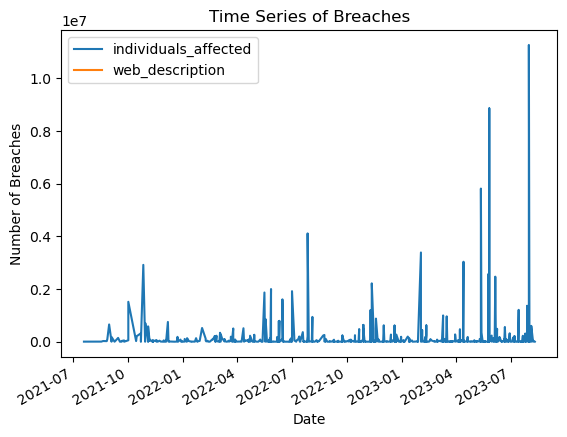

In [21]:
# Graphing out the time series to look for stationary/non-stationary nature of data
# Plot the time series
filtered_df.plot()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Breaches')
plt.title('Time Series of Breaches')

# Display the plot
plt.show()

In [22]:
from statsmodels.tsa.stattools import adfuller

# Aggregate the counts by month
monthly_counts = filtered_df.resample('M').size()

# Perform the Augmented Dickey-Fuller test
result = adfuller(monthly_counts)

# Extract the test statistic and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test statistic and p-value
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -1.4086948359401623
p-value: 0.5781006793270319


In [23]:
# Because the data are non-stationary (based on ADF above), applying differencing to make stationary

# Apply differencing to the monthly_counts series
differenced_series = monthly_counts.diff().dropna()

# Perform the Augmented Dickey-Fuller test on the differenced series
result = adfuller(differenced_series)

# Extract the test statistic and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test statistic and p-value
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -1.0612413940281062
p-value: 0.7302784178734671


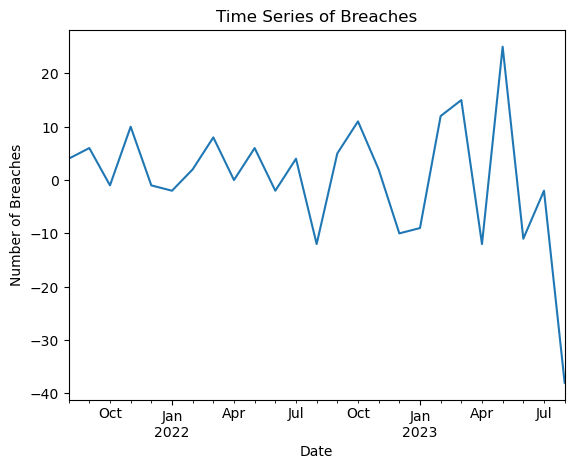

In [24]:
# Graphing the differenced_series monthly_counts
# Plot the time series
differenced_series.plot()

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Number of Breaches')
plt.title('Time Series of Breaches')

# Display the plot
plt.show()

In [25]:
# Aggregate the counts by day
daily_counts = filtered_df.resample('D').size()

# Perform the Augmented Dickey-Fuller test
result = adfuller(daily_counts)

# Extract the test statistic and p-value
adf_statistic = result[0]
p_value = result[1]

# Print the test statistic and p-value
print("ADF Statistic:", adf_statistic)
print("p-value:", p_value)

ADF Statistic: -3.833808007653184
p-value: 0.002579750001545387


In [26]:
# Monthly aggregation is non-stationary, but daily is stationary, so I'll be using that
# Need to split the data into train-test for ARIMA

# Set the train-test split ratio (e.g., 80% for training, 20% for testing)
train_ratio = 0.8
train_size = int(len(daily_counts) * train_ratio)

# Split the data into training and test sets
train_data = daily_counts[:train_size]
test_data = daily_counts[train_size:]

# Print the lengths of the training and test sets
print("Training set length:", len(train_data))
print("Test set length:", len(test_data))

Training set length: 602
Test set length: 151


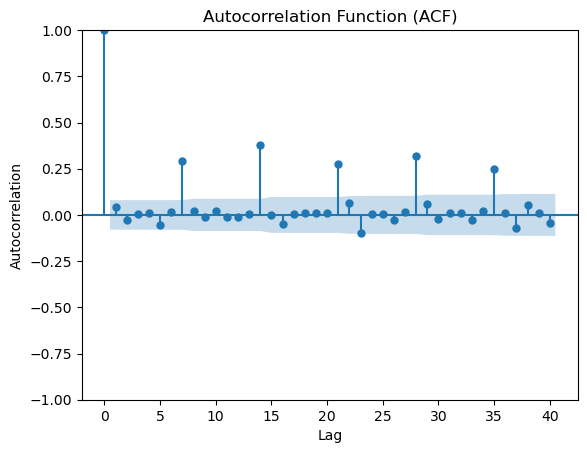

C:\Users\Victor\anaconda3.9\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


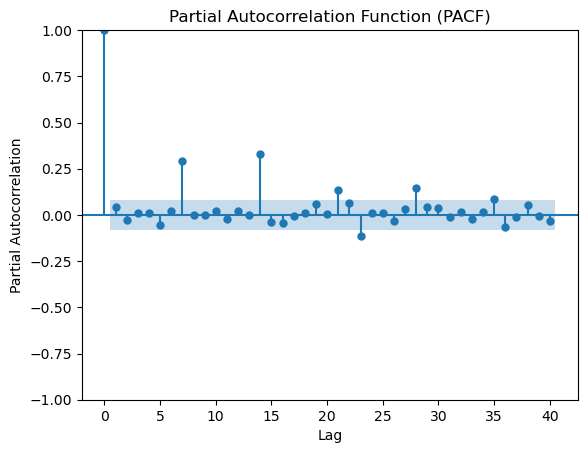

In [27]:
# Need to plot the ACV and PACF to get the parameters for the ARIMA model
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Plot ACF
plot_acf(train_data, lags=40)
plt.xlabel('Lag')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Function (ACF)')
plt.show()

# Plot PACF
plot_pacf(train_data, lags=40)
plt.xlabel('Lag')
plt.ylabel('Partial Autocorrelation')
plt.title('Partial Autocorrelation Function (PACF)')
plt.show()

In [28]:
# Because spikes for both ACF and PACF seems to occur every 7th lag, SARIMA (seasonal) most likely appropriate
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Define the order and seasonal_order parameters
# ACF and PACF spikes occur at the same lags, which suggests seasonal component may dominate the model
# Therefore start with an SARIMA(0, 0, 0)(0, 0, 0, 7) model, where the seasonal period is 7
order = (0, 0, 0)
seasonal_order = (0, 0, 0, 7)

# Fit the SARIMA model to the training data
model = SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
model_fit = model.fit()

# Print the model summary
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  602
Model:                        SARIMAX   Log Likelihood               -1099.732
Date:                Thu, 07 Sep 2023   AIC                           2201.464
Time:                        10:15:04   BIC                           2205.864
Sample:                    07-19-2021   HQIC                          2203.177
                         - 03-12-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         2.2608      0.056     40.212      0.000       2.151       2.371
Ljung-Box (L1) (Q):                   1.16   Jarque-Bera (JB):              3667.54
Prob(Q):                              0.28   Pr

In [29]:
from sklearn.metrics import mean_squared_error

# Get the predicted values and confidence intervals
pred = model_fit.get_prediction(start=test_data.index[0], end=test_data.index[-1])
pred_values = pred.predicted_mean

# Calculate the mean squared error (MSE)
mse = mean_squared_error(test_data, pred_values)

# Print the MSE
print("Mean Squared Error:", mse)

Mean Squared Error: 9.331125827814569


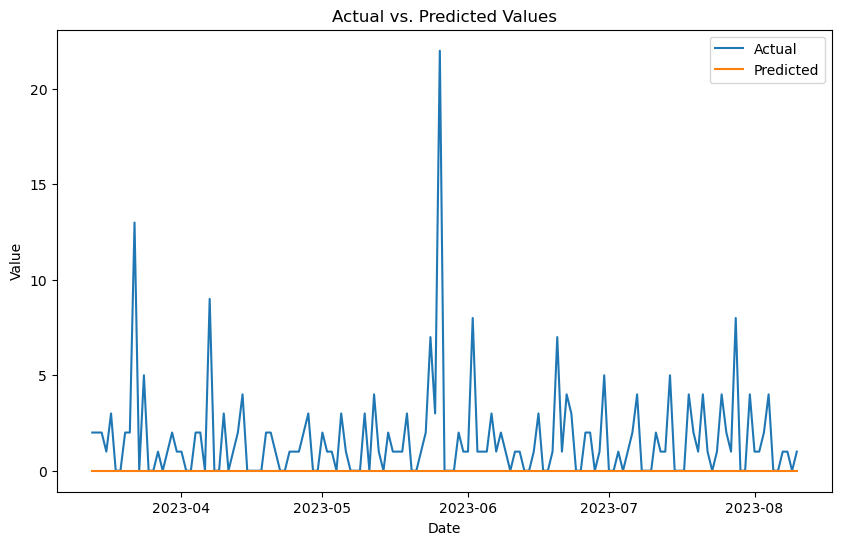

In [30]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, pred_values, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

In [31]:
# What if seasonality is not as big a factor? Does a non-seasonal ARIMA model do a better job?
from statsmodels.tsa.arima.model import ARIMA
# Define the order for the ARIMA model
order = (1, 0, 1)

# Fit the ARIMA model to the training data
arima_model = ARIMA(train_data, order=order)
arima_model_fit = arima_model.fit()

# Print the model summary
print(arima_model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  602
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -996.841
Date:                Thu, 07 Sep 2023   AIC                           2001.683
Time:                        10:15:09   BIC                           2019.284
Sample:                    07-19-2021   HQIC                          2008.533
                         - 03-12-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.8058      0.077     10.474      0.000       0.655       0.957
ar.L1         -0.7194      0.348     -2.069      0.039      -1.401      -0.038
ma.L1          0.7601      0.325      2.338      0.0

In [32]:
# Get the predicted values and confidence intervals
pred = arima_model_fit.get_prediction(start=test_data.index[0], end=test_data.index[-1])
pred_values = pred.predicted_mean

# Calculate the mean squared error (MSE)
mse = mean_squared_error(test_data, pred_values)

# Print the MSE
print("Mean Squared Error:", mse)

Mean Squared Error: 7.343560339565294


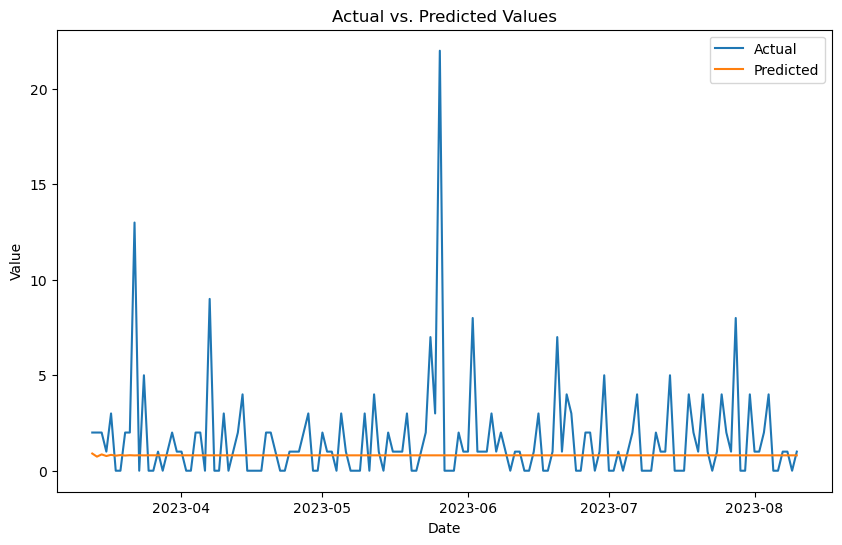

In [33]:
# Plot actual vs. predicted values
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data, label='Actual')
plt.plot(test_data.index, pred_values, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Actual vs. Predicted Values')
plt.legend()
plt.show()

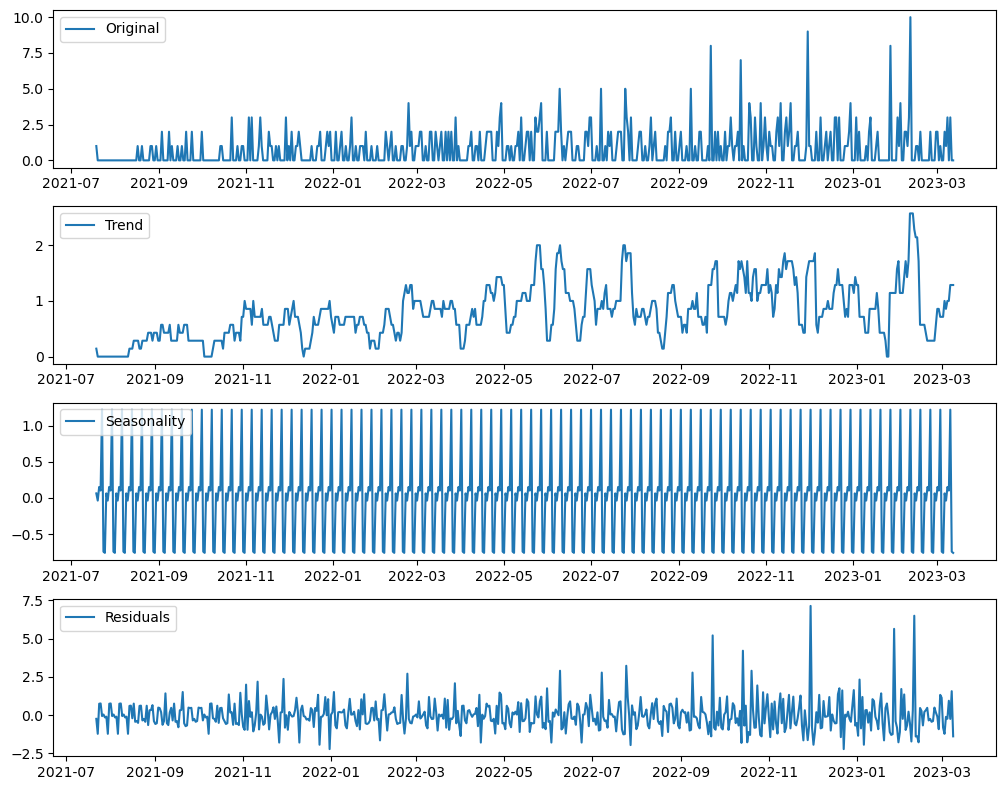

In [34]:
# Because neither SARIMA or ARIMA are good methods at prediction here, going to try Seasonal Decomposition of Time Series (STL)
from statsmodels.tsa.seasonal import seasonal_decompose

# Apply STL decomposition to train_data
decomposition = seasonal_decompose(train_data, model='additive')

# Plot the decomposed components
plt.figure(figsize=(10, 8))
plt.subplot(411)
plt.plot(train_data, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(decomposition.trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()
plt.show()